# Capstone Project - Loan Status Prediction

## Exploratory Data Analysis

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df = pd.read_csv('Loan_Train.csv')
df.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

   Current Loan Amount        Term  Credit Score  Annual Income  \
0               445412  Short Term        709.00     1167493.00   
1               262328  Short Term           NaN            NaN   
2             99999999  Short Term        741.00     2231892.00   
3               347666   Long Term        721.00      806949.00   
4               176220  Short Term           NaN            NaN   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0              8 years  Home Mortgage   Home Improvements       5214.74   
1            10+ years  Home Mortgage  Debt Consolidation      33295.98   
2              8 years       Own Home  Debt Consolidation      29200.53   
3              3 years       Own Home  Debt Consolidation       8741.90   
4              5 years           Rent  Debt Consolidation      20639.70   

   Years of Credit History  Months since last delinquent  \
0                    17.20                           NaN   
1                    21.10                          8.00   
2                    14.90                         29.00   
3                    12.00                           NaN   
4                     6.10                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                        6                          1                  228190   
1                       35                          0                  229976   
2                       18                          1                  297996   
3                        9                          0                  256329   
4                       15                          0                  253460   

   Maximum Open Credit  Bankruptcies  Tax Liens Loan Status  
0            416746.00          1.00       0.00  Fully Paid  
1            850784.00          0.00       0.00  Fully Paid  
2            750090.00          0.00       0.00  Fully Paid  
3            386958.00          0.00       0.00  Fully Paid  
4            427174.00          0.00       0.00  Fully Paid

In [ ]:
df.columns

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Loan Status'],
      dtype='object')

In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 100000
Number of columns: 19


In [ ]:
df.describe()

Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
count            100000.00      80846.00       80846.00     100000.00   
mean           11760447.39       1076.46     1378276.56      18472.41   
std            31783942.55       1475.40     1081360.20      12174.99   
min               10802.00        585.00       76627.00          0.00   
25%              179652.00        705.00      848844.00      10214.16   
50%              312246.00        724.00     1174162.00      16220.30   
75%              524942.00        741.00     1650663.00      24012.06   
max            99999999.00       7510.00   165557393.00     435843.28   

       Years of Credit History  Months since last delinquent  \
count                100000.00                      46859.00   
mean                     18.20                         34.90   
std                       7.02                         22.00   
min                       3.60                          0.00   
25%                      13.50                         16.00   
50%                      16.90                         32.00   
75%                      21.70                         51.00   
max                      70.50                        176.00   

       Number of Open Accounts  Number of Credit Problems  \
count                100000.00                  100000.00   
mean                     11.13                       0.17   
std                       5.01                       0.48   
min                       0.00                       0.00   
25%                       8.00                       0.00   
50%                      10.00                       0.00   
75%                      14.00                       0.00   
max                      76.00                      15.00   

       Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens  
count               100000.00             99998.00      99796.00   99990.00  
mean                294637.38            760798.38          0.12       0.03  
std                 376170.93           8384503.47          0.35       0.26  
min                      0.00                 0.00          0.00       0.00  
25%                 112670.00            273438.00          0.00       0.00  
50%                 209817.00            467874.00          0.00       0.00  
75%                 367958.75            782958.00          0.00       0.00  
max               32878968.00        1539737892.00          7.00      15.00

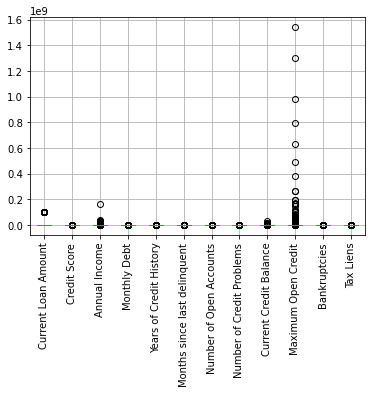

In [ ]:
df.boxplot()
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3-Q1

df_n = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

In [ ]:
df_n.shape

(58992, 19)

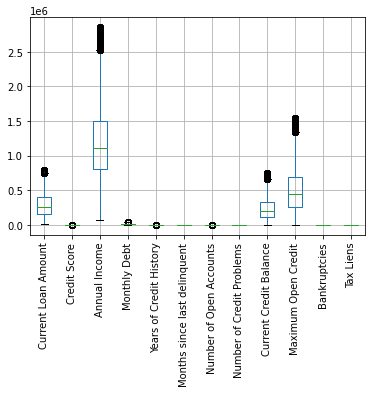

In [ ]:
df_n.boxplot()
plt.xticks(rotation='vertical')
plt.show()

We have 50% of outliers present in the dataset, here we could see that removing outliers may cause loss of information
hence we are not treating outliers

If you notice the average credit score is 1076+ which is strange considering the credit score are within the range of 300-850. Let's take a look and try to find sense of the credit score data and check if there are any score that are greater than 800.

In [ ]:
df_900 = df[df['Credit Score']>900]
df_900.head()

Loan ID  \
5   89d8cb0c-e5c2-4f54-b056-48a645c543dd   
43  0c84b81a-e5a9-4a92-8dc8-fb179add03a4   
51  0daecc08-0354-4753-b282-52124b2420df   
56  a5ada080-a058-4ad2-8953-002b7ec1ae31   
65  1704367e-1d71-4551-8d33-49aa15cab4b1   

                             Customer ID  Current Loan Amount        Term  \
5   4ffe99d3-7f2a-44db-afc1-40943f1f9750               206602  Short Term   
43  628b0914-b1d7-4028-b590-b50f5da53d06               288948  Short Term   
51  2884d362-391a-4941-af69-c825cae18002               219692   Long Term   
56  9966e08c-04a6-41ab-86d0-e4062c64bd41                78012  Short Term   
65  88f97adf-070a-47b1-9657-38276eef7d19               523908   Long Term   

    Credit Score  Annual Income Years in current job Home Ownership  \
5        7290.00      896857.00            10+ years  Home Mortgage   
43       7120.00      537472.00            10+ years           Rent   
51       6610.00      527839.00            10+ years           Rent   
56       7380.00      728726.00              4 years           Rent   
65       7370.00     1028774.00              6 years  Home Mortgage   

               Purpose  Monthly Debt  Years of Credit History  \
5   Debt Consolidation      16367.74                    17.30   
43  Debt Consolidation       5777.90                    14.80   
51  Debt Consolidation      14207.63                    17.00   
56      major_purchase      10135.36                    11.40   
65  Debt Consolidation      22632.99                    19.30   

    Months since last delinquent  Number of Open Accounts  \
5                            NaN                        6   
43                           NaN                        4   
51                         48.00                        9   
56                           NaN                        8   
65                           NaN                        5   

    Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
5                           0                  215308            272448.00   
43                          0                  132468            164406.00   
51                          0                  254277            379918.00   
56                          0                  104633            199936.00   
65                          0                  474658            742720.00   

    Bankruptcies  Tax Liens  Loan Status  
5           0.00       0.00  Charged Off  
43          0.00       0.00  Charged Off  
51          0.00       0.00  Charged Off  
56          0.00       0.00  Charged Off  
65          0.00       0.00  Charged Off

As we can see, it looks like some of the credit score are just scaled up by 10. For the ease of our calculation we can consider, scaling them back is accurate.

In [ ]:
df['Credit Score'] = df['Credit Score'].apply(lambda val: (val /10) if val>900 else val)

In [ ]:
df.describe()

Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
count            100000.00      80846.00       80846.00     100000.00   
mean           11760447.39        716.29     1378276.56      18472.41   
std            31783942.55         28.30     1081360.20      12174.99   
min               10802.00        585.00       76627.00          0.00   
25%              179652.00        703.00      848844.00      10214.16   
50%              312246.00        722.00     1174162.00      16220.30   
75%              524942.00        738.00     1650663.00      24012.06   
max            99999999.00        751.00   165557393.00     435843.28   

       Years of Credit History  Months since last delinquent  \
count                100000.00                      46859.00   
mean                     18.20                         34.90   
std                       7.02                         22.00   
min                       3.60                          0.00   
25%                      13.50                         16.00   
50%                      16.90                         32.00   
75%                      21.70                         51.00   
max                      70.50                        176.00   

       Number of Open Accounts  Number of Credit Problems  \
count                100000.00                  100000.00   
mean                     11.13                       0.17   
std                       5.01                       0.48   
min                       0.00                       0.00   
25%                       8.00                       0.00   
50%                      10.00                       0.00   
75%                      14.00                       0.00   
max                      76.00                      15.00   

       Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens  
count               100000.00             99998.00      99796.00   99990.00  
mean                294637.38            760798.38          0.12       0.03  
std                 376170.93           8384503.47          0.35       0.26  
min                      0.00                 0.00          0.00       0.00  
25%                 112670.00            273438.00          0.00       0.00  
50%                 209817.00            467874.00          0.00       0.00  
75%                 367958.75            782958.00          0.00       0.00  
max               32878968.00        1539737892.00          7.00      15.00

Now we can see our average credit score is within a normal credit score range so we can go further with our preprocessing.

In [ ]:
sns.countplot(df['Loan Status'])

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

In [ ]:
df['Loan Status'].replace(("Fully Paid","Charged Off"),(1,0), inplace=True)

In [ ]:
df.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

   Current Loan Amount        Term  Credit Score  Annual Income  \
0               445412  Short Term        709.00     1167493.00   
1               262328  Short Term           NaN            NaN   
2             99999999  Short Term        741.00     2231892.00   
3               347666   Long Term        721.00      806949.00   
4               176220  Short Term           NaN            NaN   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0              8 years  Home Mortgage   Home Improvements       5214.74   
1            10+ years  Home Mortgage  Debt Consolidation      33295.98   
2              8 years       Own Home  Debt Consolidation      29200.53   
3              3 years       Own Home  Debt Consolidation       8741.90   
4              5 years           Rent  Debt Consolidation      20639.70   

   Years of Credit History  Months since last delinquent  \
0                    17.20                           NaN   
1                    21.10                          8.00   
2                    14.90                         29.00   
3                    12.00                           NaN   
4                     6.10                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                        6                          1                  228190   
1                       35                          0                  229976   
2                       18                          1                  297996   
3                        9                          0                  256329   
4                       15                          0                  253460   

   Maximum Open Credit  Bankruptcies  Tax Liens  Loan Status  
0            416746.00          1.00       0.00            1  
1            850784.00          0.00       0.00            1  
2            750090.00          0.00       0.00            1  
3            386958.00          0.00       0.00            1  
4            427174.00          0.00       0.00            1

Loan Status is the categorical variable here denoting if the certain variable is paid off or not. In this notebook, we aim to predict that as our final/target variable.

In [ ]:
print("Value counts for each term: \n",df['Term'].value_counts())
print("Missing data in loan term:",df['Term'].isna().sum())

Value counts for each term: 
 Short Term    72208
Long Term     27792
Name: Term, dtype: int64
Missing data in loan term: 0


In [ ]:
df['Term'].replace(("Short Term","Long Term"),(0,1), inplace=True)
df.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

   Current Loan Amount  Term  Credit Score  Annual Income  \
0               445412     0        709.00     1167493.00   
1               262328     0           NaN            NaN   
2             99999999     0        741.00     2231892.00   
3               347666     1        721.00      806949.00   
4               176220     0           NaN            NaN   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0              8 years  Home Mortgage   Home Improvements       5214.74   
1            10+ years  Home Mortgage  Debt Consolidation      33295.98   
2              8 years       Own Home  Debt Consolidation      29200.53   
3              3 years       Own Home  Debt Consolidation       8741.90   
4              5 years           Rent  Debt Consolidation      20639.70   

   Years of Credit History  Months since last delinquent  \
0                    17.20                           NaN   
1                    21.10                          8.00   
2                    14.90                         29.00   
3                    12.00                           NaN   
4                     6.10                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                        6                          1                  228190   
1                       35                          0                  229976   
2                       18                          1                  297996   
3                        9                          0                  256329   
4                       15                          0                  253460   

   Maximum Open Credit  Bankruptcies  Tax Liens  Loan Status  
0            416746.00          1.00       0.00            1  
1            850784.00          0.00       0.00            1  
2            750090.00          0.00       0.00            1  
3            386958.00          0.00       0.00            1  
4            427174.00          0.00       0.00            1

In [ ]:
scount = df[df['Term'] == 0]['Term'].count()
lcount = df[df['Term'] ==1]['Term'].count()

data = {"Counts":[scount, lcount]}
termDF = pd.DataFrame(data, index=["Short Term", "Long Term"])
termDF.head()

Counts
Short Term   72208
Long Term    27792

<AxesSubplot:title={'center':'Term of Loans'}>

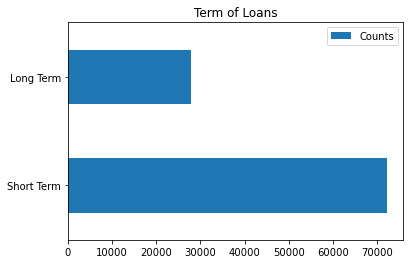

In [ ]:
termDF.plot(kind="barh", title="Term of Loans")

Since credit score is one of the important part of our analysis, we first try to explore and handle our missing data before processing further with anything.

In [ ]:
print("There are ", df['Credit Score'].isna().sum(), "null values for Credit score.")

There are  19154 null values for Credit score.


Since there are multiple ways to handle the missing data, one of which is to fill in the average of the column in the place of missing data. Here we follow the same concept but with a small tweak. We asume that the credit score of people having short term loan wouldn't be the same as credit score of people having long term loans. Hence we take separate average of credit score of people with short term loan and separate average of people with long term loan and then fill the missing credit score looking up at the term of the loan.

In [ ]:
cscoredf = df[df['Term']==0]
stermAVG = cscoredf['Credit Score'].mean()
print(stermAVG)

724.6209386906824


In [ ]:
lscoredf = df[df['Term']==1]
ltermAVG = lscoredf['Credit Score'].mean()
print(ltermAVG)

695.483727170432


In [ ]:
df.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

   Current Loan Amount  Term  Credit Score  Annual Income  \
0               445412     0        709.00     1167493.00   
1               262328     0           NaN            NaN   
2             99999999     0        741.00     2231892.00   
3               347666     1        721.00      806949.00   
4               176220     0           NaN            NaN   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0              8 years  Home Mortgage   Home Improvements       5214.74   
1            10+ years  Home Mortgage  Debt Consolidation      33295.98   
2              8 years       Own Home  Debt Consolidation      29200.53   
3              3 years       Own Home  Debt Consolidation       8741.90   
4              5 years           Rent  Debt Consolidation      20639.70   

   Years of Credit History  Months since last delinquent  \
0                    17.20                           NaN   
1                    21.10                          8.00   
2                    14.90                         29.00   
3                    12.00                           NaN   
4                     6.10                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                        6                          1                  228190   
1                       35                          0                  229976   
2                       18                          1                  297996   
3                        9                          0                  256329   
4                       15                          0                  253460   

   Maximum Open Credit  Bankruptcies  Tax Liens  Loan Status  
0            416746.00          1.00       0.00            1  
1            850784.00          0.00       0.00            1  
2            750090.00          0.00       0.00            1  
3            386958.00          0.00       0.00            1  
4            427174.00          0.00       0.00            1

In [ ]:
# do_nothing = lambda: None

In [ ]:
df.loc[(df.Term ==0) & (df['Credit Score'].isnull()),'Credit Score'] = stermAVG

In [ ]:
df.loc[(df.Term ==1) & (df['Credit Score'].isnull()),'Credit Score'] = ltermAVG

Since our problem is a classification problem, we can't have continuos variables in our dataframe. After the calculation of the missing variables we give our credit scores a range based on Experian's Credit Score Range.

In [ ]:
df['Credit Score'] = df['Credit Score'].apply(lambda val: "Poor" if np.isreal(val) and val < 580 else val)
df['Credit Score'] = df['Credit Score'].apply(lambda val: "Average" if np.isreal(val) and (val >= 580 and val < 670) else val)
df['Credit Score'] = df['Credit Score'].apply(lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val)
df['Credit Score'] = df['Credit Score'].apply(lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val)
df['Credit Score'] = df['Credit Score'].apply(lambda val: "Exceptional" if np.isreal(val) and (val >= 800 and val <= 850) else val)

<AxesSubplot:title={'center':'Number of loans in terms of Credit Score category'}>

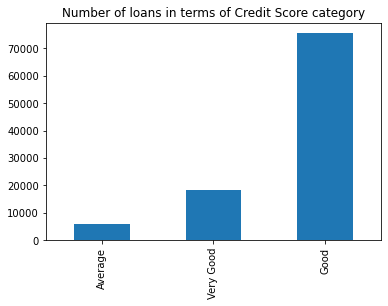

In [ ]:
df['Credit Score'].value_counts().sort_values(ascending = True).plot(kind='bar', title ='Number of loans in terms of Credit Score category')

Next up we look at our annual income column and fill up the missing values with the average of the column.

In [ ]:
print("There are",df['Annual Income'].isna().sum(), "Missing Annual Income Values.")

There are 19154 Missing Annual Income Values.


In [ ]:
df['Annual Income'].fillna(df['Annual Income'].mean(), inplace=True)

In [ ]:
df.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

   Current Loan Amount  Term Credit Score  Annual Income Years in current job  \
0               445412     0         Good     1167493.00              8 years   
1               262328     0         Good     1378276.56            10+ years   
2             99999999     0    Very Good     2231892.00              8 years   
3               347666     1         Good      806949.00              3 years   
4               176220     0         Good     1378276.56              5 years   

  Home Ownership             Purpose  Monthly Debt  Years of Credit History  \
0  Home Mortgage   Home Improvements       5214.74                    17.20   
1  Home Mortgage  Debt Consolidation      33295.98                    21.10   
2       Own Home  Debt Consolidation      29200.53                    14.90   
3       Own Home  Debt Consolidation       8741.90                    12.00   
4           Rent  Debt Consolidation      20639.70                     6.10   

   Months since last delinquent  Number of Open Accounts  \
0                           NaN                        6   
1                          8.00                       35   
2                         29.00                       18   
3                           NaN                        9   
4                           NaN                       15   

   Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
0                          1                  228190            416746.00   
1                          0                  229976            850784.00   
2                          1                  297996            750090.00   
3                          0                  256329            386958.00   
4                          0                  253460            427174.00   

   Bankruptcies  Tax Liens  Loan Status  
0          1.00       0.00            1  
1          0.00       0.00            1  
2          0.00       0.00            1  
3          0.00       0.00            1  
4          0.00       0.00            1

Following up on our step with Credit Score, we now try to change it to a discrete value, but since it has multiple class, we use one hot encoding to make sure we dont increase the dimension of our data. We also look out for potential multi-colinearity as we drop one variable of the encoding, which is easily calculated given the other four variables. This is consistent through out the notebook, with the use of one hot encoding.

In [ ]:
df = df.join(pd.get_dummies(df['Credit Score'], drop_first = True))

Since our values were only adjectives, we give it new names to make it more clear.

In [ ]:
df.rename(index = str, columns={'Good':'Credit Good', 'Very Good':'Credit Very Good'}).head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

   Current Loan Amount  Term Credit Score  Annual Income Years in current job  \
0               445412     0         Good     1167493.00              8 years   
1               262328     0         Good     1378276.56            10+ years   
2             99999999     0    Very Good     2231892.00              8 years   
3               347666     1         Good      806949.00              3 years   
4               176220     0         Good     1378276.56              5 years   

  Home Ownership             Purpose  Monthly Debt  ...  \
0  Home Mortgage   Home Improvements       5214.74  ...   
1  Home Mortgage  Debt Consolidation      33295.98  ...   
2       Own Home  Debt Consolidation      29200.53  ...   
3       Own Home  Debt Consolidation       8741.90  ...   
4           Rent  Debt Consolidation      20639.70  ...   

   Months since last delinquent  Number of Open Accounts  \
0                           NaN                        6   
1                          8.00                       35   
2                         29.00                       18   
3                           NaN                        9   
4                           NaN                       15   

   Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
0                          1                  228190            416746.00   
1                          0                  229976            850784.00   
2                          1                  297996            750090.00   
3                          0                  256329            386958.00   
4                          0                  253460            427174.00   

   Bankruptcies  Tax Liens  Loan Status  Credit Good  Credit Very Good  
0          1.00       0.00            1            1                 0  
1          0.00       0.00            1            1                 0  
2          0.00       0.00            1            0                 1  
3          0.00       0.00            1            1                 0  
4          0.00       0.00            1            1                 0  

[5 rows x 21 columns]

In [ ]:
df = df.drop(['Credit Score'], axis=1)

In [ ]:
df['Purpose'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Purpose for Loans", figsize=(15,10))

<AxesSubplot:title={'center':'Purpose for Loans'}>

In [ ]:
purposeloanstatus = df[['Purpose','Loan Status']]
purposeloanstatus.head(10)

Purpose  Loan Status
0   Home Improvements            1
1  Debt Consolidation            1
2  Debt Consolidation            1
3  Debt Consolidation            1
4  Debt Consolidation            1
5  Debt Consolidation            0
6  Debt Consolidation            1
7           Buy House            0
8  Debt Consolidation            1
9  Debt Consolidation            1

In [ ]:
pd.crosstab(purposeloanstatus['Purpose'], purposeloanstatus['Loan Status']).plot(kind='bar', stacked=True, figsize=(20,10), title="Purpose of Loan Vs Loan Payment Status", )

<AxesSubplot:title={'center':'Purpose of Loan Vs Loan Payment Status'}, xlabel='Purpose'>

Next up, we take a look at the Home ownership status of the people who have taken loan and try to visualize it.

In [ ]:
df['Home Ownership'].value_counts().sort_values(ascending = True).plot(kind='bar', title="Number of Loan based on Home ownership")

<AxesSubplot:title={'center':'Number of Loan based on Home ownership'}>

As we can see most of the loans have been either by the people have mortgage on their home or by people who are in rent.

In [ ]:
df = df.join(pd.get_dummies(df['Home Ownership'],drop_first = True))

In [ ]:
df = df.drop(['Home Ownership'], axis=1)

Moving forward, age of employment is one of the major factor in deciding the person's financial stability and secure income sources. Here our data was a String with non uniform spread. first we need to extract the given numbers from our data and then give it a unform range to convert it into a categorical variable.

In [ ]:
df['Years in current job']=df['Years in current job'].str.extract(r"(\d+)")
df['Years in current job'] = df['Years in current job'].astype(float)
# df['Years in current job'].fillna(df['Years in current job'].mean(), inplace = True)

In [ ]:
expmean = df['Years in current job'].mean()

In [ ]:
df['Years in current job'].fillna(expmean, inplace=True)

Now That we have a numerical value for our Employment Age, we use a uniform range to convert it into categories.

In [ ]:
df['Employment History'] = df['Years in current job'].apply(lambda x: "Emp Level Jr." if x<4 else ("Emp Level Mid" if x>4 and x<8 else "Emp Senior"))

In [ ]:
df.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

   Current Loan Amount  Term  Annual Income  Years in current job  \
0               445412     0     1167493.00                  8.00   
1               262328     0     1378276.56                 10.00   
2             99999999     0     2231892.00                  8.00   
3               347666     1      806949.00                  3.00   
4               176220     0     1378276.56                  5.00   

              Purpose  Monthly Debt  Years of Credit History  \
0   Home Improvements       5214.74                    17.20   
1  Debt Consolidation      33295.98                    21.10   
2  Debt Consolidation      29200.53                    14.90   
3  Debt Consolidation       8741.90                    12.00   
4  Debt Consolidation      20639.70                     6.10   

   Months since last delinquent  ...  Maximum Open Credit  Bankruptcies  \
0                           NaN  ...            416746.00          1.00   
1                          8.00  ...            850784.00          0.00   
2                         29.00  ...            750090.00          0.00   
3                           NaN  ...            386958.00          0.00   
4                           NaN  ...            427174.00          0.00   

   Tax Liens  Loan Status  Good  Very Good  Home Mortgage  Own Home  Rent  \
0       0.00            1     1          0              1         0     0   
1       0.00            1     1          0              1         0     0   
2       0.00            1     0          1              0         1     0   
3       0.00            1     1          0              0         1     0   
4       0.00            1     1          0              0         0     1   

   Employment History  
0          Emp Senior  
1          Emp Senior  
2          Emp Senior  
3       Emp Level Jr.  
4       Emp Level Mid  

[5 rows x 23 columns]

In [ ]:
df = df.drop(['Years in current job'], axis=1)

Now that we have the categories for our employment history, we use one hot encoding on the column.

In [ ]:
df = df.join(pd.get_dummies(df['Employment History'],drop_first = True))

we then drop the Employment History column.

In [ ]:
df = df.drop(['Employment History'], axis=1)

If we take a look at our data, there are columns like Loan ID, Customer ID which isn't important for our analysis. While we can argue in some cases purpose of loan could be one deciding factor but here we consider it to be unimportant and drop that as well.

In [ ]:
df = df.drop(['Loan ID','Customer ID','Purpose'], axis=1)

In [ ]:
df.head()

Current Loan Amount  Term  Annual Income  Monthly Debt  \
0               445412     0     1167493.00       5214.74   
1               262328     0     1378276.56      33295.98   
2             99999999     0     2231892.00      29200.53   
3               347666     1      806949.00       8741.90   
4               176220     0     1378276.56      20639.70   

   Years of Credit History  Months since last delinquent  \
0                    17.20                           NaN   
1                    21.10                          8.00   
2                    14.90                         29.00   
3                    12.00                           NaN   
4                     6.10                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                        6                          1                  228190   
1                       35                          0                  229976   
2                       18                          1                  297996   
3                        9                          0                  256329   
4                       15                          0                  253460   

   Maximum Open Credit  Bankruptcies  Tax Liens  Loan Status  Good  Very Good  \
0            416746.00          1.00       0.00            1     1          0   
1            850784.00          0.00       0.00            1     1          0   
2            750090.00          0.00       0.00            1     0          1   
3            386958.00          0.00       0.00            1     1          0   
4            427174.00          0.00       0.00            1     1          0   

   Home Mortgage  Own Home  Rent  Emp Level Mid  Emp Senior  
0              1         0     0              0           1  
1              1         0     0              0           1  
2              0         1     0              0           1  
3              0         1     0              0           0  
4              0         0     1              1           0

Next up is number of credit problems reported for each individual loanee. We split that into three categories with 0 being None, 1-5 as Some and more than 5 to be major credit problems.

In [ ]:
df['Credit Problems'] = df['Number of Credit Problems'].apply(lambda x: "No Credit Problem" if x==0 else ("Some Credit promblem" if x>0 and x<5 else "Major Credit Problems"))

In [ ]:
df['Credit Problems'].value_counts()

No Credit Problem        86035
Some Credit promblem     13879
Major Credit Problems       86
Name: Credit Problems, dtype: int64

<AxesSubplot:title={'center':'Loans vs Credit problems of Loanee'}>

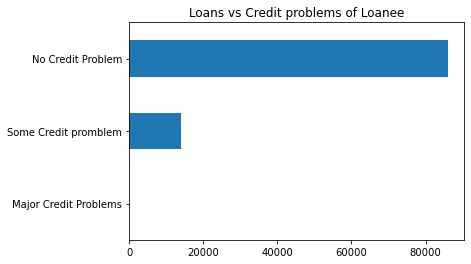

In [ ]:
df['Credit Problems'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Loans vs Credit problems of Loanee")

Looking at the graph above, we establish a common asumption that loans are generally not given to people having credit problems. Next up, we convert Credit Problems into discrete variables.

In [ ]:
df = df.join(pd.get_dummies(df['Credit Problems'],drop_first = True))

In [ ]:
df = df.drop(['Credit Problems','Number of Credit Problems'], axis=1)

In [ ]:
df.head()

Current Loan Amount  Term  Annual Income  Monthly Debt  \
0               445412     0     1167493.00       5214.74   
1               262328     0     1378276.56      33295.98   
2             99999999     0     2231892.00      29200.53   
3               347666     1      806949.00       8741.90   
4               176220     0     1378276.56      20639.70   

   Years of Credit History  Months since last delinquent  \
0                    17.20                           NaN   
1                    21.10                          8.00   
2                    14.90                         29.00   
3                    12.00                           NaN   
4                     6.10                           NaN   

   Number of Open Accounts  Current Credit Balance  Maximum Open Credit  \
0                        6                  228190            416746.00   
1                       35                  229976            850784.00   
2                       18                  297996            750090.00   
3                        9                  256329            386958.00   
4                       15                  253460            427174.00   

   Bankruptcies  ...  Loan Status  Good  Very Good  Home Mortgage  Own Home  \
0          1.00  ...            1     1          0              1         0   
1          0.00  ...            1     1          0              1         0   
2          0.00  ...            1     0          1              0         1   
3          0.00  ...            1     1          0              0         1   
4          0.00  ...            1     1          0              0         0   

   Rent  Emp Level Mid  Emp Senior  No Credit Problem  Some Credit promblem  
0     0              0           1                  0                     1  
1     0              0           1                  1                     0  
2     0              0           1                  0                     1  
3     0              0           0                  1                     0  
4     1              1           0                  1                     0  

[5 rows x 21 columns]

Another important feature for financial stability identification is the years of credit history. We look at the given credit age of individuals and categorize them using one hot encoding.

In [ ]:
df['Credit Age'] = df['Years of Credit History'].apply(lambda x: "Short Credit Age" if x<5 else ("Good Credit Age" if x>5 and x<17 else "Exceptional Credit Age"))

In [ ]:
df = df.join(pd.get_dummies(df['Credit Age'],drop_first = True))

In [ ]:
df = df.drop(['Credit Age','Years of Credit History'], axis =1)
df.head()

Current Loan Amount  Term  Annual Income  Monthly Debt  \
0               445412     0     1167493.00       5214.74   
1               262328     0     1378276.56      33295.98   
2             99999999     0     2231892.00      29200.53   
3               347666     1      806949.00       8741.90   
4               176220     0     1378276.56      20639.70   

   Months since last delinquent  Number of Open Accounts  \
0                           NaN                        6   
1                          8.00                       35   
2                         29.00                       18   
3                           NaN                        9   
4                           NaN                       15   

   Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens  ...  \
0                  228190            416746.00          1.00       0.00  ...   
1                  229976            850784.00          0.00       0.00  ...   
2                  297996            750090.00          0.00       0.00  ...   
3                  256329            386958.00          0.00       0.00  ...   
4                  253460            427174.00          0.00       0.00  ...   

   Very Good  Home Mortgage  Own Home  Rent  Emp Level Mid  Emp Senior  \
0          0              1         0     0              0           1   
1          0              1         0     0              0           1   
2          1              0         1     0              0           1   
3          0              0         1     0              0           0   
4          0              0         0     1              1           0   

   No Credit Problem  Some Credit promblem  Good Credit Age  Short Credit Age  
0                  0                     1                0                 0  
1                  1                     0                0                 0  
2                  0                     1                1                 0  
3                  1                     0                1                 0  
4                  1                     0                1                 0  

[5 rows x 22 columns]

We move forward with the asumption that some of the columns are correlated with the others and hence we try to reduce the number of features. For example, we have credit score and credit problems which can is calculated using features like maximum open credit, current credit balance etc. So we drop some of the columns that we asume are already covered by features we have on our dataframe.

In [ ]:
df = df.drop(['Months since last delinquent','Number of Open Accounts','Maximum Open Credit','Current Credit Balance','Monthly Debt'],axis=1)

In [ ]:
df.head()

Current Loan Amount  Term  Annual Income  Bankruptcies  Tax Liens  \
0               445412     0     1167493.00          1.00       0.00   
1               262328     0     1378276.56          0.00       0.00   
2             99999999     0     2231892.00          0.00       0.00   
3               347666     1      806949.00          0.00       0.00   
4               176220     0     1378276.56          0.00       0.00   

   Loan Status  Good  Very Good  Home Mortgage  Own Home  Rent  Emp Level Mid  \
0            1     1          0              1         0     0              0   
1            1     1          0              1         0     0              0   
2            1     0          1              0         1     0              0   
3            1     1          0              0         1     0              0   
4            1     1          0              0         0     1              1   

   Emp Senior  No Credit Problem  Some Credit promblem  Good Credit Age  \
0           1                  0                     1                0   
1           1                  1                     0                0   
2           1                  0                     1                1   
3           0                  1                     0                1   
4           0                  1                     0                1   

   Short Credit Age  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

Further exploring the financial stability of each loanee, we take the look at number of liens on their property by court which would give us information about their previous commitments.

In [ ]:
df['Tax Liens'] = df['Tax Liens'].apply(lambda x: "No Tax Lien" if x==0 else ("Some Tax Liens" if x>0 and x<3 else "Many Tax Liens"))

In [ ]:
df = df.join(pd.get_dummies(df['Tax Liens'],drop_first = True))

In [ ]:
df = df.drop(['Tax Liens'],axis=1)
df.head()

Current Loan Amount  Term  Annual Income  Bankruptcies  Loan Status  Good  \
0               445412     0     1167493.00          1.00            1     1   
1               262328     0     1378276.56          0.00            1     1   
2             99999999     0     2231892.00          0.00            1     0   
3               347666     1      806949.00          0.00            1     1   
4               176220     0     1378276.56          0.00            1     1   

   Very Good  Home Mortgage  Own Home  Rent  Emp Level Mid  Emp Senior  \
0          0              1         0     0              0           1   
1          0              1         0     0              0           1   
2          1              0         1     0              0           1   
3          0              0         1     0              0           0   
4          0              0         0     1              1           0   

   No Credit Problem  Some Credit promblem  Good Credit Age  Short Credit Age  \
0                  0                     1                0                 0   
1                  1                     0                0                 0   
2                  0                     1                1                 0   
3                  1                     0                1                 0   
4                  1                     0                1                 0   

   No Tax Lien  Some Tax Liens  
0            1               0  
1            1               0  
2            1               0  
3            1               0  
4            1               0

Furthermore, we take a look at nuber of bankruptcies filed by people and categorize them.

In [ ]:
df['Bankruptcies'] = df['Bankruptcies'].apply(lambda x: "No bankruptcies" if x==0 else ("Some Bankruptcies" if x>0 and x<3 else "Many Bankruptcies"))

In [ ]:
df = df.join(pd.get_dummies(df['Bankruptcies'],drop_first = True))

In [ ]:
df = df.drop(['Bankruptcies'],axis=1)
df.head()

Current Loan Amount  Term  Annual Income  Loan Status  Good  Very Good  \
0               445412     0     1167493.00            1     1          0   
1               262328     0     1378276.56            1     1          0   
2             99999999     0     2231892.00            1     0          1   
3               347666     1      806949.00            1     1          0   
4               176220     0     1378276.56            1     1          0   

   Home Mortgage  Own Home  Rent  Emp Level Mid  Emp Senior  \
0              1         0     0              0           1   
1              1         0     0              0           1   
2              0         1     0              0           1   
3              0         1     0              0           0   
4              0         0     1              1           0   

   No Credit Problem  Some Credit promblem  Good Credit Age  Short Credit Age  \
0                  0                     1                0                 0   
1                  1                     0                0                 0   
2                  0                     1                1                 0   
3                  1                     0                1                 0   
4                  1                     0                1                 0   

   No Tax Lien  Some Tax Liens  No bankruptcies  Some Bankruptcies  
0            1               0                0                  1  
1            1               0                1                  0  
2            1               0                1                  0  
3            1               0                1                  0  
4            1               0                1                  0

In [ ]:
df.describe()

Current Loan Amount      Term  Annual Income  Loan Status      Good  \
count            100000.00 100000.00      100000.00    100000.00 100000.00   
mean           11760447.39      0.28     1378276.56         0.77      0.76   
std            31783942.55      0.45      972297.42         0.42      0.43   
min               10802.00      0.00       76627.00         0.00      0.00   
25%              179652.00      0.00      931180.50         1.00      1.00   
50%              312246.00      0.00     1369919.00         1.00      1.00   
75%              524942.00      1.00     1512704.00         1.00      1.00   
max            99999999.00      1.00   165557393.00         1.00      1.00   

       Very Good  Home Mortgage  Own Home      Rent  Emp Level Mid  \
count  100000.00      100000.00 100000.00 100000.00      100000.00   
mean        0.18           0.48      0.09      0.42           0.22   
std         0.39           0.50      0.29      0.49           0.42   
min         0.00           0.00      0.00      0.00           0.00   
25%         0.00           0.00      0.00      0.00           0.00   
50%         0.00           0.00      0.00      0.00           0.00   
75%         0.00           1.00      0.00      1.00           0.00   
max         1.00           1.00      1.00      1.00           1.00   

       Emp Senior  No Credit Problem  Some Credit promblem  Good Credit Age  \
count   100000.00          100000.00             100000.00        100000.00   
mean         0.46               0.86                  0.14             0.50   
std          0.50               0.35                  0.35             0.50   
min          0.00               0.00                  0.00             0.00   
25%          0.00               1.00                  0.00             0.00   
50%          0.00               1.00                  0.00             0.00   
75%          1.00               1.00                  0.00             1.00   
max          1.00               1.00                  1.00             1.00   

       Short Credit Age  No Tax Lien  Some Tax Liens  No bankruptcies  \
count         100000.00    100000.00       100000.00        100000.00   
mean               0.00         0.98            0.02             0.89   
std                0.04         0.14            0.13             0.32   
min                0.00         0.00            0.00             0.00   
25%                0.00         1.00            0.00             1.00   
50%                0.00         1.00            0.00             1.00   
75%                0.00         1.00            0.00             1.00   
max                1.00         1.00            1.00             1.00   

       Some Bankruptcies  
count          100000.00  
mean                0.11  
std                 0.31  
min                 0.00  
25%                 0.00  
50%                 0.00  
75%                 0.00  
max                 1.00

We already know we're predicting categorical variables hence we have to convert our cateorical variables into discrete. Next up we try to convert annual income and total loan amount into discrete variables. There are some calculation we do before deciding a range from the categories. If we take a look, we have some data that are outliers and are way off the other loan amounts. so we try to calculate the average and standard deviation without the outlier. We asume : Mean - 1 standard deviation = low income line Mean + 1 standard deviation = high income line and similar for the loan amount as well.

In [ ]:
mean_outlier = df[df['Annual Income'] < 99999999.00 ]['Annual Income'].mean()
stddev_outlier = df[df['Annual Income'] < 99999999.00 ]['Annual Income'].std()
poor_line = mean_outlier -  stddev_outlier
rich_line = mean_outlier + stddev_outlier

In [ ]:
df['Annual Income'] = df['Annual Income'].apply(lambda x: "Low Income" if x<=poor_line else ("Average Income" if x>poor_line and x<rich_line else "High Income"))

In [ ]:
df = df.join(pd.get_dummies(df['Annual Income'],drop_first = True))

In [ ]:
df = df.drop(['Annual Income'], axis=1)
df.head()

Current Loan Amount  Term  Loan Status  Good  Very Good  Home Mortgage  \
0               445412     0            1     1          0              1   
1               262328     0            1     1          0              1   
2             99999999     0            1     0          1              0   
3               347666     1            1     1          0              0   
4               176220     0            1     1          0              0   

   Own Home  Rent  Emp Level Mid  Emp Senior  No Credit Problem  \
0         0     0              0           1                  0   
1         0     0              0           1                  1   
2         1     0              0           1                  0   
3         1     0              0           0                  1   
4         0     1              1           0                  1   

   Some Credit promblem  Good Credit Age  Short Credit Age  No Tax Lien  \
0                     1                0                 0            1   
1                     0                0                 0            1   
2                     1                1                 0            1   
3                     0                1                 0            1   
4                     0                1                 0            1   

   Some Tax Liens  No bankruptcies  Some Bankruptcies  High Income  Low Income  
0               0                0                  1            0           0  
1               0                1                  0            0           0  
2               0                1                  0            1           0  
3               0                1                  0            0           0  
4               0                1                  0            0           0

In [ ]:
loan_mean_outlier = df[df['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].mean()
loan_stddev_outlier = df[df['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].std()
low_range = loan_mean_outlier - loan_stddev_outlier
high_range = loan_mean_outlier + loan_stddev_outlier
print(low_range, high_range)

126051.43019084723 498575.76557037106


In [ ]:
df['Current Loan Amount'] = df['Current Loan Amount'].apply(lambda x: "Small Loan" if x<=low_range else ("Medium Loan" if x>low_range and x<high_range else "Big Loan"))

In [ ]:
df = df.join(pd.get_dummies(df['Current Loan Amount'],drop_first = True))

In [ ]:
df = df.drop(['Current Loan Amount'], axis=1)

In [ ]:
df.head()

Term  Loan Status  Good  Very Good  Home Mortgage  Own Home  Rent  \
0     0            1     1          0              1         0     0   
1     0            1     1          0              1         0     0   
2     0            1     0          1              0         1     0   
3     1            1     1          0              0         1     0   
4     0            1     1          0              0         0     1   

   Emp Level Mid  Emp Senior  No Credit Problem  ...  Good Credit Age  \
0              0           1                  0  ...                0   
1              0           1                  1  ...                0   
2              0           1                  0  ...                1   
3              0           0                  1  ...                1   
4              1           0                  1  ...                1   

   Short Credit Age  No Tax Lien  Some Tax Liens  No bankruptcies  \
0                 0            1               0                0   
1                 0            1               0                1   
2                 0            1               0                1   
3                 0            1               0                1   
4                 0            1               0                1   

   Some Bankruptcies  High Income  Low Income  Medium Loan  Small Loan  
0                  1            0           0            1           0  
1                  0            0           0            1           0  
2                  0            1           0            0           0  
3                  0            0           0            1           0  
4                  0            0           0            1           0  

[5 rows x 21 columns]

In [ ]:
X = df.drop('Loan Status', axis=1)
y = df['Loan Status']

In [ ]:
X.head()

Term  Good  Very Good  Home Mortgage  Own Home  Rent  Emp Level Mid  \
0     0     1          0              1         0     0              0   
1     0     1          0              1         0     0              0   
2     0     0          1              0         1     0              0   
3     1     1          0              0         1     0              0   
4     0     1          0              0         0     1              1   

   Emp Senior  No Credit Problem  Some Credit promblem  Good Credit Age  \
0           1                  0                     1                0   
1           1                  1                     0                0   
2           1                  0                     1                1   
3           0                  1                     0                1   
4           0                  1                     0                1   

   Short Credit Age  No Tax Lien  Some Tax Liens  No bankruptcies  \
0                 0            1               0                0   
1                 0            1               0                1   
2                 0            1               0                1   
3                 0            1               0                1   
4                 0            1               0                1   

   Some Bankruptcies  High Income  Low Income  Medium Loan  Small Loan  
0                  1            0           0            1           0  
1                  0            0           0            1           0  
2                  0            1           0            0           0  
3                  0            0           0            1           0  
4                  0            0           0            1           0

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Loan Status, dtype: int64

In [ ]:
X.dtypes

Term                    int64
Good                    uint8
Very Good               uint8
Home Mortgage           uint8
Own Home                uint8
Rent                    uint8
Emp Level Mid           uint8
Emp Senior              uint8
No Credit Problem       uint8
Some Credit promblem    uint8
Good Credit Age         uint8
Short Credit Age        uint8
No Tax Lien             uint8
Some Tax Liens          uint8
No bankruptcies         uint8
Some Bankruptcies       uint8
High Income             uint8
Low Income              uint8
Medium Loan             uint8
Small Loan              uint8
dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain,ytest = train_test_split(X,y,test_size = 0.3, random_state =10)

In [ ]:
LR = LogisticRegression()
model = LR.fit(Xtrain,ytrain)

In [ ]:
ypred = model.predict(Xtest)
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve

print(classification_report(ytest,ypred))

print(confusion_matrix(ytest,ypred))

roc_auc_score(ytest,ypred)

              precision    recall  f1-score   support

           0       0.58      0.00      0.00      6758
           1       0.77      1.00      0.87     23242

    accuracy                           0.77     30000
   macro avg       0.68      0.50      0.44     30000
weighted avg       0.73      0.77      0.68     30000

[[    7  6751]
 [    5 23237]]


0.5004103408125818

In [ ]:
# !pip install imblearn

In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
# !pip install delayed

In [ ]:
X.dtypes

Term                    int32
Good                    uint8
Very Good               uint8
Home Mortgage           uint8
Own Home                uint8
Rent                    uint8
Emp Level Mid           uint8
Emp Senior              uint8
No Credit Problem       uint8
Some Credit promblem    uint8
Good Credit Age         uint8
Short Credit Age        uint8
No Tax Lien             uint8
Some Tax Liens          uint8
No bankruptcies         uint8
Some Bankruptcies       uint8
High Income             uint8
Low Income              uint8
Medium Loan             uint8
Small Loan              uint8
dtype: object

In [ ]:
X['Term'] = X['Term'].astype('int32')
y = y.astype('int32')

In [ ]:
sm = SMOTEENN()
X_resampled,y_resampled = sm.fit_resample(X,y)

MemoryError: Unable to allocate 1.00 GiB for an array with shape (5928, 22639) and data type float64